**EZMALL Recommendation System:**


---

By: 

Prem Jha(premjha3010@gmail.com)
  
Aditya Jain(adityajain1974@gmail.com)

Pranav Badhe(badhepranav5@gmail.com)

*This notebook contains data preparation for the system*

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_excel("/content/bi_fb_mkt_shopping_feeds.xls")

In [ ]:
df

,id,title,description,availability,condition,price,link,image_link,brand,additional_image_link,age_group,color,gender,item_group_id,google_product_category,material,pattern,product_type,sale_price,sale_price_effective_date,shipping,size,custom_label_0,custom_label_1,custom_label_2,custom_label_3,custom_label_4,gtin
0,1,Set of 3 Rani Haar and Earrings by Touchstone,Online Shopping for Set of 3 Rani Haar and Ear...,out of stock,new,1800.00 INR,https://www.ezmall.com/women/jewellery/artific...,https://cdn.ezmall.com/0/images/product/1/001-...,Touchstone,https://cdn.ezmall.com/0/images/product/1/001-...,NaN,MULTI,NaN,NaN,Apparel & Accessories > Jewelry > Jewelry Sets,NaN,NaN,Women > Jewellery > Artificial Jewellery > Nec...,999.00 INR,NaN,51.00 INR,NaN,Women,Jewellery,Artificial Jewellery,Necklace Sets,NaN,NaN
1,5,Lotus Herbals 5 Pc Anti Ageing Kit,Online Shopping for Lotus Herbals 5 Pc Anti Ag...,out of stock,new,1765.00 INR,https://www.ezmall.com/women/beauty-personal-c...,https://cdn.ezmall.com/0/images/product/5/Lotu...,Lotus Herbals,https://cdn.ezmall.com/0/images/product/5/Lotu...,NaN,"MULTI,GOLD",NaN,NaN,Health & Beauty > Personal Care > Cosmetics > ...,NaN,NaN,Women > Beauty & Personal Care > Body & Skin C...,1199.00 INR,NaN,101.00 INR,NaN,Women,Beauty & Personal Care,Body & Skin Care,Facial Kits,NaN,NaN
2,27,Touchstone 6 Pair Ethnic Earring Collection,Online Shopping for Touchstone 6 Pair Ethnic E...,out of stock,new,1800.00 INR,https://www.ezmall.com/women/jewellery/artific...,https://cdn.ezmall.com/0/images/product/27/001...,Touchstone,https://cdn.ezmall.com/0/images/product/27/001...,NaN,NaN,NaN,NaN,Apparel & Accessories > Jewelry > Jewelry Sets,NaN,NaN,Women > Jewellery > Artificial Jewellery > Ear...,999.00 INR,NaN,51.00 INR,NaN,Women,Jewellery,Artificial Jewellery,Earrings,NaN,NaN
3,47,Khadi Mauri 12 Pc. Herbal Skin Care Kit not use,Wondering if one kit alone could suffice the b...,out of stock,new,1600.00 INR,https://www.ezmall.com/women/beauty-personal-c...,https://cdn.ezmall.com/0/images/product/47/Kha...,Khadi Mauri,https://cdn.ezmall.com/0/images/product/47/Kha...,NaN,NaN,NaN,NaN,Health & Beauty > Personal Care > Cosmetics > ...,NaN,NaN,Women > Beauty & Personal Care > Body & Skin C...,1199.00 INR,NaN,51.00 INR,NaN,Women,Beauty & Personal Care,Body & Skin Care,Skin Care Combos,NaN,NaN
4,53,2 Rajasthani Bed Sheets & 4 Pillow Covers Not USE,Inspired from the rich architectural heritage ...,out of stock,new,5000.00 INR,https://www.ezmall.com/home-kitchen/furnishing...,https://cdn.ezmall.com/0/images/product/53/001...,Bella Casa,https://cdn.ezmall.com/0/images/product/53/001...,NaN,NaN,NaN,NaN,Home & Garden > Linens & Bedding > Bedding > B...,NaN,NaN,Home & Kitchen > Furnishings & Furniture > Bed...,1699.00 INR,NaN,101.00 INR,NaN,Home & Kitchen,Furnishings & Furniture,Bed Linen,Bed Sheets,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2344,141243,Digital Thermometer,Digital Thermometer,out of stock,new,140.00 INR,https://www.ezmall.com/electronics-appliances/...,https://cdn.ezmall.com/0/images/product/141243...,Dr. ODIN,https://cdn.ezmall.com/0/images/product/141243...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Electronics & Appliances > Health Appliances >...,140.00 INR,NaN,0.00 INR,NaN,Electronics & Appliances,Health Appliances,Thermometers,NaN,NaN,NaN
2345,141244,Digital Thermometer,Digital Thermometer,out of stock,new,240.00 INR,https://www.ezmall.com/electronics-appliances/...,https://cdn.ezmall.com/0/images/product/141244...,Dr. ODIN,https://cdn.ezmall.com/0/images/product/141244...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Electronics & Appliances > Health Appliances >...,240.00 INR,NaN,0.00 INR,NaN,Electronics & Appliances,Health Appliances,Thermometers,NaN,NaN,NaN
2346,141245,BLOOD GLUCOSE MONITORING SYSTEM GDH-FAD (FULL ...,BLOOD GLUCOSE MONITORING SYSTEM GDH-FAD (FULL ...,out of stock,new,1325.00 INR,https://www.ezmall.com/electronics-appliances/...,https:/

In [ ]:
df.shape

(2349, 28)

In [ ]:
df.isna().sum()

id                              0
title                           0
description                     0
availability                    0
condition                       0
price                           3
link                            0
image_link                      5
brand                           0
additional_image_link           5
age_group                    2349
color                        1470
gender                       2349
item_group_id                2349
google_product_category        55
material                     2349
pattern                      2349
product_type                    0
sale_price                      3
sale_price_effective_date    2349
shipping                        3
size                         1431
custom_label_0                  0
custom_label_1                  0
custom_label_2                  0
custom_label_3                984
custom_label_4               2349
gtin                         2337
dtype: int64

In [ ]:
df=df.drop(['gtin','custom_label_4','custom_label_3','sale_price_effective_date','pattern','material','item_group_id','gender','age_group'],axis=1)

In [ ]:
df.isna().sum()

id                            0
title                         0
description                   0
availability                  0
condition                     0
price                         3
link                          0
image_link                    5
brand                         0
additional_image_link         5
color                      1470
google_product_category      55
product_type                  0
sale_price                    3
shipping                      3
size                       1431
custom_label_0                0
custom_label_1                0
custom_label_2                0
dtype: int64

In [ ]:
df['color'] = df['color'].replace(np.nan, 'no color')
df['size'] = df['size'].replace(np.nan, 'no size')

col_0,NO of products
availability,
in stock,910
out of stock,1439


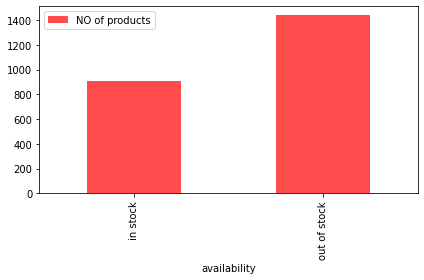

In [ ]:
availability = pd.crosstab(index = df['availability'],columns = ['NO of products'])
availability.plot(kind = 'bar',color = 'r',alpha = 0.7)
plt.legend()
plt.tight_layout()
availability

In [ ]:
df['product_type'][22]

'Women > Ethnic Wear > Sarees & Blouses > Sarees'

col_0,NO of products
condition,
new,2349


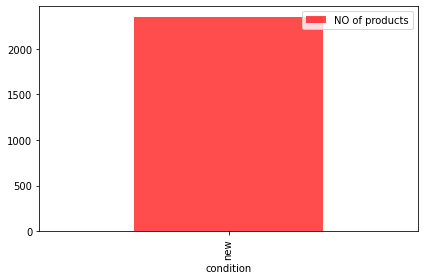

In [ ]:
condition = pd.crosstab(index = df['condition'],columns = ['NO of products'])
condition.plot(kind = 'bar',color = 'r',alpha = 0.7)
plt.legend()
plt.tight_layout()
condition

In [ ]:
df['additional_image_link'][221]

'https://cdn.ezmall.com/0/images/product/3937/Lee_Cooper_Mens_Navy_Sneakers-Set-001.jpg,https://cdn.ezmall.com/0/images/product/3937/Lee_Cooper_Mens_Navy_Sneakers-Set-002.jpg,https://cdn.ezmall.com/0/images/product/3937/Lee_Cooper_Mens_Navy_Sneakers-Set-003.jpg,https://cdn.ezmall.com/0/images/product/3937/Lee_Cooper_Mens_Navy_Sneakers-Set-004.jpg,https://cdn.ezmall.com/0/images/product/3937/Lee_Cooper_Mens_Navy_Sneakers-Set-005.jpg'

In [ ]:
df.loc[223, ['custom_label_0','custom_label_1', 'custom_label_2']]

custom_label_0             Men
custom_label_1        Footwear
custom_label_2    Sports Shoes
Name: 223, dtype: object

In [ ]:
df['google_product_category'][223]

'Apparel & Accessories > Shoes'

In [ ]:
df['product_type'][223]

'Men > Footwear > Sports Shoes'

In [ ]:
df[['category', 'subcategory']] = df['google_product_category'].str.split('>', 1, expand=True)

In [ ]:
df=df.drop("google_product_category",axis=1)

col_0,NO of products
category,
Apparel & Accessories,1066
Arts & Entertainment,1
Electronics,45
Electronics & Appliances,4
"Food, Beverages & Tobacco",54
Furniture,9
Hardware,2
Health & Beauty,192
Home & Garden,912


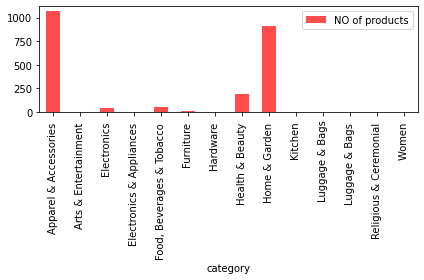

In [ ]:
category = pd.crosstab(index = df['category'],columns = ['NO of products'])
category.plot(kind = 'bar',color = 'r',alpha = 0.7)
plt.legend()
plt.tight_layout()
category

In [ ]:
df=df.dropna()

In [ ]:
df=df.reset_index()

In [ ]:
df.isna().sum()

index                    0
id                       0
title                    0
description              0
availability             0
condition                0
price                    0
link                     0
image_link               0
brand                    0
additional_image_link    0
color                    0
product_type             0
sale_price               0
shipping                 0
size                     0
custom_label_0           0
custom_label_1           0
custom_label_2           0
category                 0
subcategory              0
dtype: int64

In [ ]:
df.head()

,index,id,title,description,availability,condition,price,link,image_link,brand,additional_image_link,color,product_type,sale_price,shipping,size,custom_label_0,custom_label_1,custom_label_2,category,subcategory
0,0,1,Set of 3 Rani Haar and Earrings by Touchstone,Online Shopping for Set of 3 Rani Haar and Ear...,out of stock,new,1800.00 INR,https://www.ezmall.com/women/jewellery/artific...,https://cdn.ezmall.com/0/images/product/1/001-...,Touchstone,https://cdn.ezmall.com/0/images/product/1/001-...,MULTI,Women > Jewellery > Artificial Jewellery > Nec...,999.00 INR,51.00 INR,no size,Women,Jewellery,Artificial Jewellery,Apparel & Accessories,Jewelry > Jewelry Sets
1,1,5,Lotus Herbals 5 Pc Anti Ageing Kit,Online Shopping for Lotus Herbals 5 Pc Anti Ag...,out of stock,new,1765.00 INR,https://www.ezmall.com/women/beauty-personal-c...,https://cdn.ezmall.com/0/images/product/5/Lotu...,Lotus Herbals,https://cdn.ezmall.com/0/images/product/5/Lotu...,"MULTI,GOLD",Women > Beauty & Personal Care > Body & Skin C...,1199.00 INR,101.00 INR,no size,Women,Beauty & Personal Care,Body & Skin Care,Health & Beauty,Personal Care > Cosmetics > Skin Care > Anti-...
2,2,27,Touchstone 6 Pair Ethnic Earring Collection,Online Shopping for Touchstone 6 Pair Ethnic E...,out of stock,new,1800.00 INR,https://www.ezmall.com/women/jewellery/artific...,https://cdn.ezmall.com/0/images/product/27/001...,Touchstone,https://cdn.ezmall.com/0/images/product/27/001...,no color,Women > Jewellery > Artificial Jewellery > Ear...,999.00 INR,51.00 INR,no size,Women,Jewellery,Artificial Jewellery,Apparel & Accessories,Jewelry > Jewelry Sets
3,3,47,Khadi Mauri 12 Pc. Herbal Skin Care Kit not use,Wondering if one kit alone could suffice the b...,out of stock,new,1600.00 INR,https://www.ezmall.com/women/beauty-personal-c...,https://cdn.ezmall.com/0/images/product/47/Kha...,Khadi Mauri,https://cdn.ezmall.com/0/images/product/47/Kha...,no color,Women > Beauty & Personal Care > Body & Skin C...,1199.00 INR,51.00 INR,no size,Women,Beauty & Personal Care,Body & Skin Care,Health & Beauty,Personal Care > Cosmetics > Skin Care > Anti-...
4,4,53,2 Rajasthani Bed Sheets & 4 Pillow Covers Not USE,Inspired from the rich architectural heritage ...,out of stock,new,5000.00 INR,https://www.ezmall.com/home-kitchen/furnishing...,https://cdn.ezmall.com/0/images/product/53/001...,Bella Casa,https://cdn.ezmall.com/0/images/product/53/001...,no color,Home & Kitchen > Furnishings & Furniture > Bed...,1699.00 INR,101.00 INR,no size,Home & Kitchen,Furnishings & Furniture,Bed Linen,Home & Garden,Linens & Bedding > Bedding > Bed Sheets


In [ ]:
df.shape

(2285, 21)

In [ ]:
df=df.drop(['index','availability','condition','additional_image_link','sale_price','product_type','subcategory'],axis=1)

In [ ]:
df.shape

(2285, 14)

In [ ]:
df.isna().sum()

id                0
title             0
description       0
price             0
link              0
image_link        0
brand             0
color             0
shipping          0
size              0
custom_label_0    0
custom_label_1    0
custom_label_2    0
category          0
dtype: int64

In [ ]:
df

,id,title,description,price,link,image_link,brand,color,shipping,size,custom_label_0,custom_label_1,custom_label_2,category
0,1,Set of 3 Rani Haar and Earrings by Touchstone,Online Shopping for Set of 3 Rani Haar and Ear...,1800.00 INR,https://www.ezmall.com/women/jewellery/artific...,https://cdn.ezmall.com/0/images/product/1/001-...,Touchstone,MULTI,51.00 INR,no size,Women,Jewellery,Artificial Jewellery,Apparel & Accessories
1,5,Lotus Herbals 5 Pc Anti Ageing Kit,Online Shopping for Lotus Herbals 5 Pc Anti Ag...,1765.00 INR,https://www.ezmall.com/women/beauty-personal-c...,https://cdn.ezmall.com/0/images/product/5/Lotu...,Lotus Herbals,"MULTI,GOLD",101.00 INR,no size,Women,Beauty & Personal Care,Body & Skin Care,Health & Beauty
2,27,Touchstone 6 Pair Ethnic Earring Collection,Online Shopping for Touchstone 6 Pair Ethnic E...,1800.00 INR,https://www.ezmall.com/women/jewellery/artific...,https://cdn.ezmall.com/0/images/product/27/001...,Touchstone,no color,51.00 INR,no size,Women,Jewellery,Artificial Jewellery,Apparel & Accessories
3,47,Khadi Mauri 12 Pc. Herbal Skin Care Kit not use,Wondering if one kit alone could suffice the b...,1600.00 INR,https://www.ezmall.com/women/beauty-personal-c...,https://cdn.ezmall.com/0/images/product/47/Kha...,Khadi Mauri,no color,51.00 INR,no size,Women,Beauty & Personal Care,Body & Skin Care,Health & Beauty
4,53,2 Rajasthani Bed Sheets & 4 Pillow Covers Not USE,Inspired from the rich architectural heritage ...,5000.00 INR,https://www.ezmall.com/home-kitchen/furnishing...,https://cdn.ezmall.com/0/images/product/53/001...,Bella Casa,no color,101.00 INR,no size,Home & Kitchen,Furnishings & Furniture,Bed Linen,Home & Garden
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2280,141221,Pick Any 1 Wardrobe with Shoe Rack + Free 3 Pc...,Pick Any 1 Wardrobe with Shoe Rack + Free 3 Pc...,4999.00 INR,https://www.ezmall.com/home-kitchen/home-impro...,https://cdn.ezmall.com/0/images/product/141221...,Harrisson,"PINK,PURPLE,BROWN",201.00 INR,no size,Home & Kitchen,Home Improvement,Home Storage & Organising,Home & Garden
2281,141222,Pick any 1 Leather Retail Shoulder Handbag,Pick any 1 Leather Retail Shoulder Handbag,999.00 INR,https://www.ezmall.com/women/women-accessories...,https://cdn.ezmall.com/0/images/product/141222...,Leather Retail,"MAROON,YELLOW,PINK,BLACK,PURPLE",0.00 INR,no size,Women,Women Accessories,Hand Bags & Clutches,Apparel & Accessories
2282,141223,Pick Any 1 Leather Retail Women Beautiful Handbag,Pick Any 1 Leather Retail Women Beautiful Handbag,999.00 INR,https://www.ezmall.com/women/women-accessories...,https://cdn.ezmall.com/0/images/product/141223...,Leather Retail,"MAROON,BLACK",0.00 INR,no size,Women,Women Accessories,Hand Bags & Clutches,Apparel & Accessories
2283,141246,Egg Boiler,Egg Boiler,1000.00 INR,https://www.ezmall.com/home-kitchen/kitchen-di...,https://cdn.ezmall.com/0/images/product/141246...,Unique Dealz,no color,0.00 INR,no size,Home & Kitchen,Kitchen & Dining,Kitchen Tools,Home & Garden


In [ ]:
df['title']=df['title'].str.strip()
df['custom_label_0']=df['custom_label_0'].str.strip()
df['custom_label_1']=df['custom_label_1'].str.strip()
df['custom_label_2']=df['custom_label_2'].str.strip()
df['category']=df['category'].str.strip()
df['price']=df['price'].str.strip()

In [ ]:
df['price'] = df['price'].str.split('INR', 1, expand=True)


In [ ]:
df['price'].min()

'1000.00 '

In [ ]:
df['price'][22]

'1999.00 '

In [ ]:
df=df.drop_duplicates(subset=['title'])

In [ ]:
df.shape

(2130, 14)

In [ ]:
df=df.reset_index()

In [ ]:
df

,index,id,title,description,price,link,image_link,brand,color,shipping,size,custom_label_0,custom_label_1,custom_label_2,category
0,0,1,Set of 3 Rani Haar and Earrings by Touchstone,Online Shopping for Set of 3 Rani Haar and Ear...,1800.00,https://www.ezmall.com/women/jewellery/artific...,https://cdn.ezmall.com/0/images/product/1/001-...,Touchstone,MULTI,51.00 INR,no size,Women,Jewellery,Artificial Jewellery,Apparel & Accessories
1,1,5,Lotus Herbals 5 Pc Anti Ageing Kit,Online Shopping for Lotus Herbals 5 Pc Anti Ag...,1765.00,https://www.ezmall.com/women/beauty-personal-c...,https://cdn.ezmall.com/0/images/product/5/Lotu...,Lotus Herbals,"MULTI,GOLD",101.00 INR,no size,Women,Beauty & Personal Care,Body & Skin Care,Health & Beauty
2,2,27,Touchstone 6 Pair Ethnic Earring Collection,Online Shopping for Touchstone 6 Pair Ethnic E...,1800.00,https://www.ezmall.com/women/jewellery/artific...,https://cdn.ezmall.com/0/images/product/27/001...,Touchstone,no color,51.00 INR,no size,Women,Jewellery,Artificial Jewellery,Apparel & Accessories
3,3,47,Khadi Mauri 12 Pc. Herbal Skin Care Kit not use,Wondering if one kit alone could suffice the b...,1600.00,https://www.ezmall.com/women/beauty-personal-c...,https://cdn.ezmall.com/0/images/product/47/Kha...,Khadi Mauri,no color,51.00 INR,no size,Women,Beauty & Personal Care,Body & Skin Care,Health & Beauty
4,4,53,2 Rajasthani Bed Sheets & 4 Pillow Covers Not USE,Inspired from the rich architectural heritage ...,5000.00,https://www.ezmall.com/home-kitchen/furnishing...,https://cdn.ezmall.com/0/images/product/53/001...,Bella Casa,no color,101.00 INR,no size,Home & Kitchen,Furnishings & Furniture,Bed Linen,Home & Garden
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2125,2280,141221,Pick Any 1 Wardrobe with Shoe Rack + Free 3 Pc...,Pick Any 1 Wardrobe with Shoe Rack + Free 3 Pc...,4999.00,https://www.ezmall.com/home-kitchen/home-impro...,https://cdn.ezmall.com/0/images/product/141221...,Harrisson,"PINK,PURPLE,BROWN",201.00 INR,no size,Home & Kitchen,Home Improvement,Home Storage & Organising,Home & Garden
2126,2281,141222,Pick any 1 Leather Retail Shoulder Handbag,Pick any 1 Leather Retail Shoulder Handbag,999.00,https://www.ezmall.com/women/women-accessories...,https://cdn.ezmall.com/0/images/product/141222...,Leather Retail,"MAROON,YELLOW,PINK,BLACK,PURPLE",0.00 INR,no size,Women,Women Accessories,Hand Bags & Clutches,Apparel & Accessories
2127,2282,141223,Pick Any 1 Leather Retail Women Beautiful Handbag,Pick Any 1 Leather Retail Women Beautiful Handbag,999.00,https://www.ezmall.com/women/women-accessories...,https://cdn.ezmall.com/0/images/product/141223...,Leather Retail,"MAROON,BLACK",0.00 INR,no size,Women,Women Accessories,Hand Bags & Clutches,Apparel & Accessories
2128,2283,141246,Egg Boiler,Egg Boiler,1000.00,https://www.ezmall.com/home-kitchen/kitchen-di...,https://cdn.ezmall.com/0/images/product/141246...,Unique Dealz,no color,0.00 INR,no size,Home & Kitchen,Kitchen & Dining,Kitchen Tools,Home & Garden


In [ ]:
df=df.drop('index',axis=1)

In [ ]:
df.to_csv('data.csv')